# Web Scraping Cheat Sheet (2022), Python for Web Scraping

The complete guide to web scraping: Beautiful Soup, Selenium, Scrapy, XPath, and more!

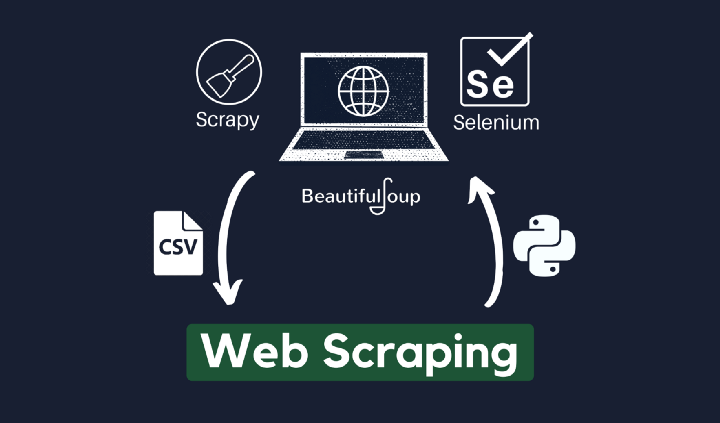

Web Scraping is the process of extracting data from a website. Although you only need the basics of Python to start learning web scraping, this might sometimes get complicated because web scraping goes beyond Python. It also involves learning the basics of HTML, XPath, and tons of new methods in Beautiful Soup, Selenium, or Scrapy.

This is why I decided to create this cheat sheet — to walk you through all the stuff you have to learn to successfully scrape a website with Python. This goes from the basic Python stuff you need to know before learning web scraping to the most complete web scraping framework, Scrapy.

Below, you’ll find the topics covered. I’m leaving the basic Python stuff at the end of the article since most of you are probably familiar with it. In case you’re an absolute beginner start with that section and then follow the order of the list below to easily learn web scraping.

Table of Contents
1. HTML for Web Scraping
 - HTML Element Syntax
 - HTML Code Example
 - HTML Tree Structure
2. Beautiful Soup Cheat Sheet
 - Installing and importing the libraries
 - Creating the “soup”
 - Finding elements: find() vs find_all()
 - Getting the values: text vs get_text()
3. XPath (Necessary for Selenium and Scrapy) 
 - XPath Syntax
 - XPath Functions and Operators
 - XPath Special Characters
4. Selenium Cheat Sheet
 - Installing and importing the libraries
 - Creating the "driver"
 - Finding elements: find_element_by() vs find_elements_by()
 - Getting the values: text
 - Waits: Implicit Waits vs Explicit Waits
 - Options: Headless mode, block ads, and more
5. Scrapy Cheat Sheet
 - Setting up Scrapy
 - Creating a Project and Spider
 - The Template
 - Finding elements and getting the text value
 - Return data extracted
 - Run the spider and export data to CSV or JSON
6. Python Basics for Web Scraping
7. Web Scraping Cheat Sheet [PDF]

Important Note: A few months ago Selenium 4 was released. There are only a few changes between Selenium 3.x versions and Selenium 4. You can check out those changes in my web scraping cheat sheet in PDF format.

# HTML Element Syntax

An HTML element usually uses tags and attributes for its syntax. The tags define how your web browser must format and display the content. Most HTML elements are written with an opening tag and closing tag, with content in between. The attributes define the additional properties of the element.

Let’s imagine we’re about to scrape a website that contains the transcript of movies, so you inspect a movie’s title. The HTML element behind the title will look like the picture below.

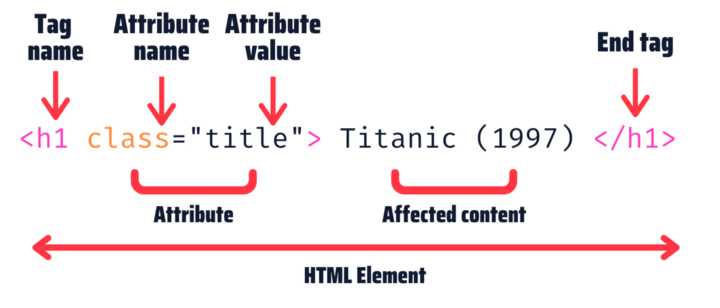

Let’s see each element. First, the tag name is set to h1. This will give the word Titanic (1997) the biggest heading size of a page. Some other common tags are a, p and div. Then we have the attribute name set to class, which is one of the most common attributes. The last element is the content Titanic (1997). This is the only element you see on the page before inspecting.

# HTML Code Example

So far we’ve seen just a single element HTML element, but the HTML code behind a website has hundreds of elements like the image above. Fortunately, when scraping a website we will only analyze the elements that contain the data we want to get.

To easily understand HTML code, let’s check the following small code I wrote as an example.

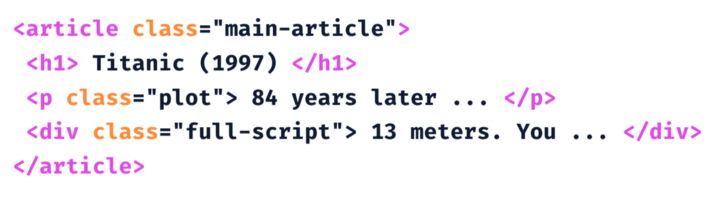

This code represents a web that has the title, plot, and transcript of the movie Titanic. Each element has a tag name and most of them have an attribute. The HTML code is structured with “nodes”. There are element nodes, attribute nodes, and text nodes. This might be hard to identify in plain code, so we’ll see them much better in a tree structure.

# HTML Tree Structure

The image below is the tree structure of the HTML code example we’ve seen before.

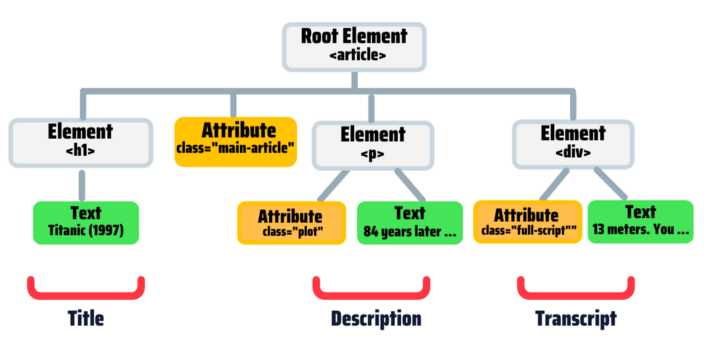

In the tree above, each rectangle represents a node. The gray rectangles represent element nodes, the yellow rectangles represent attribute nodes and the green rectangles represent text nodes. Also, the tree shows hierarchical relationships between nodes (parent, child, and sibling nodes). Let’s identify the relationships between nodes.

-The “root node” is the top node. In this example, >article< is the root.

-Every node has exactly one “parent”, except the root. The ">h1<" node’s parent is the ">article<" node.
    
-An element node can have zero, one, or several “children,” but attributes and text nodes have no children. ">p<" has two child nodes, but no child elements.

-“Siblings” are nodes with the same parent (e.g., "h1", "p" and "div")
    
-A node’s children and its children’s children are called its “descendants”. Similarly, a node’s parent and its parent’s parent are called its “ancestors”.

When doing web scraping, locating children and parent nodes is sometimes vital when you can’t find a particular element but only its parent or child. We will see this in detail in the XPath section.

# Installing the libraries

To start working with Beautiful Soup we need 3 libraries. We use “beautifulsoup4” to scrape the website, “requests” to send requests to the website and “lxml” for parsing XML and HTML. Open up a terminal and run the following commands.

pip install beautifulsoup4

pip install requests

pip install lxml

# Importing the libraries

After installing the necessary libraries, import BeautifulSoup and requests before scraping the website.

from bs4 import BeautifulSoup

import requests

# Creating the “soup”

In Beautiful Soup we use the “soup” object to find elements in a website. To create this object do the following.

1.Fetch the pages (write the website you wish to scrape within parentheses)

result = requests.get("www.google.com")

2.Get the page content

content = result.text

3. Create the soup

soup = BeautifulSoup(content, "lxml")

What we’ve done so far is what we always do regardless of the website you wish to scrape.

# Finding elements: find() vs find_all()

There are two ways to get elements with Beautiful Soup:find() and find_all(). We use find() to get the first element that matches a specific tag name, class name, and id, while find_all() will get all the elements that matched and put them inside a list.

Both find() and find_all() have a similar syntax. Let’s have a look.

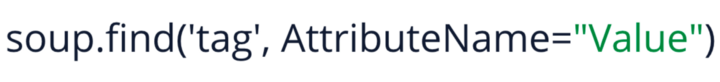

The find() and find_all() usually takes 2 arguments, but we can omit any of them if necessary. Also, we should use “class_” whenever we want to locate an element by its class name. The “_” is only to make this argument different from Python’s class keyword. Another common attribute used to locate elements is id because it represents unique elements.

Let’s look at some examples of how to locate elements with Beautiful Soup. We’ll be using the HTML code we’ve seen before.

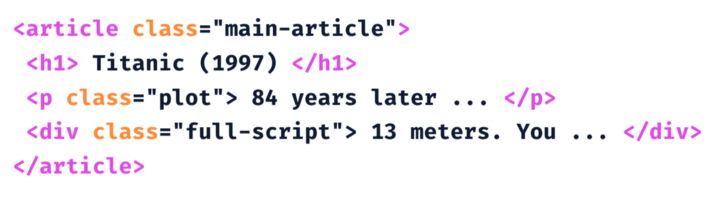

Let’s locate the article element and title.

Get the article element

element1 = soup.find(‘article’, class_=”main_article”)

Get the title element

element2 = soup.find(‘h1’)

Let’s imagine there are multiple h2 elements. We can get all of them with find_all()

Get all h2 elements

elements = soup.find_all(“h2”)

We could also use find_all() in the examples we used for find() but we would’ve obtained a list with a single element.

# Getting the values: text vs get_text()

Most of the time we want to get the text inside an element. There are 2 options to get the text in Beautiful Soup: text and get_text(). The first is a property while the second is a function. Both return the text of a tag as a string but with get_text() we can also add various keyword arguments to change how it behaves (e.g.,separator, strip, types)

Let’s look at some examples using the “element2” we got before.

data = element2.text

data = element2.get_text(strip=True, separator=' ')

In this particular example, text and get_text() will return the same text “Titanic (1997).” However, if we’re scraping “dirty” data, the strip and separator arguments will come in handy. The first will get rid of leading and trailing spaces of the text, while the second adds a blank space as a separator (this will replace a newline ‘\n’ for example)

We can also get a specific attribute of an element — like thehref attribute within an a tag (the href will help us get the link of the element)

Get the "a" tag

element = soup.find('a')

Get the attribute value

data = element.get('href')

# XPath (Necessary for Selenium and Scrapy)

Before learning Selenium or Scrapy, we have to learn how to build an XPath. XPath is a query language for selecting nodes from an XML document. This will help us locate an element when the HTML code isn’t simple

<h2> XPath Syntax </h2>

An XPath usually contains a tag name, attribute name, and attribute value. Let’s have a look at the XPath syntax.

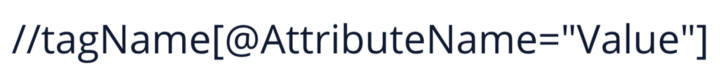

The // and @ are special characters that we’ll see later. Now let’s check some examples to locate some elements of the HTML code we’ve been using so far.

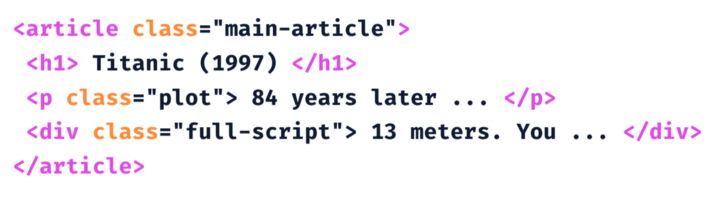

Let’s build the XPath of the article element, title, and transcript.

<h3> Article element XPath </h3>

//article[@class="main-article"]

<h3>Title element XPath</h3>

//h1

<h3>Transcript element XPath</h3>

//div[@class="full-script"]

# XPath Functions and Operators

Sometimes the HTML elements are complicated to locate with a simple XPath. This is when we need to use XPath functions. One of the most useful functions is contains. The contains function has the following syntax.

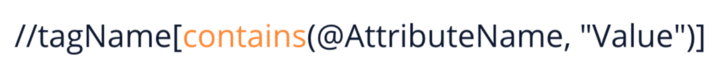

Let’s look at some examples with the HTML code we’ve used above.

<h3>Article element XPath</h3>

//article[contains(@class, "main")]

<h3>Transcript element XPath</h3>

//div[contains(@class, "script")]

As you can see, we don’t need to write the whole value, but only a part of it. This is extremely useful when working with long values or attributes that have multiple value names.

On the other hand, XPath can also use "and" and "or" logical operators. Both have the same syntax.

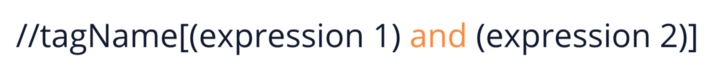

To see an example, let’s imagine we have an extra "p" element with attribute 'class=”plot2"' in our HTML code.

<h3>Locate elements that has either "plot" or "plot2" values<h/3>

//p[(@class="plot") or (@class="plot2")]

<h2>XPath Special Characters</h2>

Building XPath might be a bit trickier in the beginning because there are many characters that we don’t know their meaning. This is why I made the table below that contains the most common special characters.

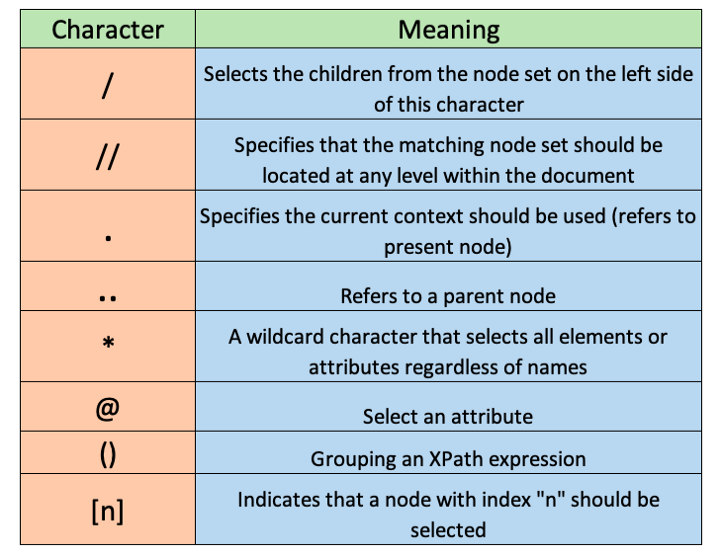

# Selenium

Selenium is more powerful than Beautiful Soup because it allows you to scrape JavaScript-driven pages.

I recommend you solve a project to memorize all the Selenium methods listed in this guide. Below there’s my step-by-step tutorial on how to solve a Selenium project from scratch.

Tutorial: Python Selenium for Beginners — A Complete Web Scraping Project

<h3>Installing the libraries and Chromedriver</h3>

To start working with Selenium we need to install the <i>selenium</i> library and download chromedriver.

To download Chromedriver, go to this link. In the “Current Releases” section click on the Chromedriver version that corresponds to your Chrome browser (to check the version, click the 3 dot button on the upper right corner, click on “Help”, then click on “About Google Chrome”).

After you download the file, unzip it and remember where it’s located.

To install Selenium, open up a terminal and run the following commands.

pip install selenium

<h3>Importing the libraries</h3>

After installing the necessary libraries, import <i>webdriver</i> before scraping the website.

from selenium import webdriver

<h3>Creating the “driver”</h3>

In Selenium we use the “driver” object to find elements in a website. To create this object, do the following.

Define the website you wish to scrape and path where Chromedriver was downloaded

web = "www.google.com"

path = "introduce chromedriver path"

Once the driver is created we can open the website with <i>.get()</i>. Remember always to close the website after you scrape the content.

Open the website

driver.get(web)

Close the website

driver.quit()

What we’ve done so far is what we always do regardless of the website you wish to scrape.

<h3>Finding elements: find_element_by() vs find_elements_by()</h3>

There are two ways to get elements with Selenium: <i>find_element_by()</i> and <i>find_elements_by()</i>. We use the first to get the first element that matches a specific tag name, class name, id, and XPath, while the latter will get all the elements that matched and put them inside a list.

Let’s have a look at the syntax of finding elements with Selenium.

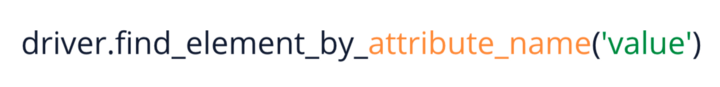

You can replace the <i>attribute_name</i> with any attribute. Below you can find the most common attributes used.

Finding a single element

driver.find_element_by_id(‘id_value’)

Finding multiple elements (returns a list)

<pre>driver.find_elements_by_class_name('value')
driver.find_elements_by_css_selector('value')
driver.find_elements_by_tag_name('value')
driver.find_elements_by_name('value')
driver.find_elements_by_xpath('value')</pre>

In the case of XPaths, there’s a special syntax.

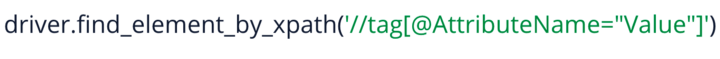

Let’s look at some examples. We’ll be using the HTML code we’ve seen before.

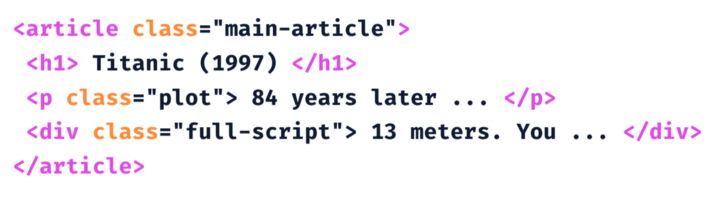

Let’s locate the article element, title, and transcript.

<pre>Get the article element
element1 = driver.find_element_by_class_name('main-article')</pre>

<pre>Get the title element
element2 = driver.find_element_by_tag_name('h1')</pre>

<pre>Get the transcript
element3=driver.find_element_by_xpath('//div[@class="full-script"]')</pre>

<h3>Getting the values: text</h3>

Most of the time we want to get the text inside an element. In Selenium we can use <i>.text</i> to get the text we want

Let’s look at some examples using the “element2” we got before.

data = element2.text

In this particular example, <i>text</i> will return the text “Titanic (1997).” The <i>.text</i> does a good job formating the text we scrape, but if necessary use <i>strip</i> and the <b><i>separator</b></i> functions as additional operations after getting the data.

<h3>Waits: Implicit Waits vs Explicit Waits (Handling ElementNotVisibleException)</h3>

One of the problems of scraping Javascript-driven websites is that the data is loaded dynamically so it can take some seconds to display all the data correctly. As a result, an element might not be located in the DOM (Document Object Model) when scraping the website, so we’ll get an “ElementNotVisibleException.” This is why we have to make the driver wait until the data we wish to scrape is loaded completely.

There are 2 types of waits: implicit & explicit waits. An implicit wait is used to tell the web driver to wait for a certain amount of time when trying to locate an element. In Python, you can import the <b><i>time</b>,</i> library and then make an implicit wait with <b><i>time.sleep()</b></i> and specify the seconds to wait within parentheses. For example, if you want to make the driver stop for 2 seconds, write this.

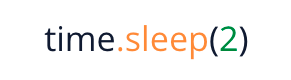

On the other hand, an explicit wait makes the web driver wait for a specific condition (Expected Conditions) to occur before proceeding further with the execution. First, you need to import a couple of libraries besides <b>webdriver</b>

<pre>from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC</pre>

<pre>driver = webdriver.Chrome()
driver.get("www.google.com")</pre>

<""explicit wait syntax""> 

driver.quit()

Explicit waits have the following syntax.

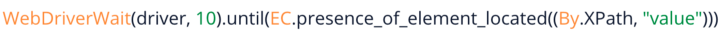

Let’s look at an example. We’ll locate the transcript element we’ve seen before, but now with expected conditions.

<pre>Get the transcript
element = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPath, '//div[@class="full-script"]')))</pre>

This will make the web driver wait for 10 seconds until an element with XPath <b>‘//div[@class=”full-script”]’</b> shows up in the DOM.

So far we’ve used <b>presence_of_element_located</b>, but there are other conditions. To name a few:

<pre>presence_of_all_elements_located
element_to_be_clickable
visibility_of_element_located
element_located_to_be_selected</pre>

<h3>Options: Headless mode, block ads, and more</h3>

Web scraping might get repetitive if we see the same browser opening over and over again or get trickier if the website we want to scrape has ads that interfere when scraping the data we want. Fortunately, you can easily deal with these and many other issues a browser has by using Selenium’s Options.

First, you need to import the <b>Options</b> library.

<pre>from selenium import webdriver
from selenium.webdriver.chrome.options import Options</pre>

Then to make Selenium silently scrape in the background, activate headless mode.

<pre>Create instance
options = Options()</pre>

<pre>Activate Headless mode
options.headless = True 
driver = webdriver.Chrome(options=options)
...</pre>

In this example, we created an <b>options</b> instance and then set headless to <b>True</b> and finally, added the <b>options</b> instance to the <b>options</b> argument of webdriver.

To make Selenium block ads, we have to download a third-party Chrome extension. For example, you can download <b>Adblock Plus</b> and then add the path of the extension to <b>options</b>.

<pre>Create instance
options = Options()</pre>

<pre>Add the path of the extension
options.add_argument('path_of_extension')
driver = webdriver.Chrome(options=options)</pre>

# Scrapy

Scrapy is the most powerful web scraping framework in Python and it’s also a bit complicated to start with compare to Beautiful Soup and Selenium.

<h3>Installing the libraries</h3>

Although you can easily install Scrapy with <b>pip install Scrapy</b> it’s not recommended to do it this way in the <b><u>official documentation</b></u> because you might get some installation issues (especially on Windows).

It’s recommended to install Scrapy through Anaconda or Miniconda and use the package from the conda-forge channel. After you download either Ananconda or Miniconda, create a new environment, then open up a terminal (click on the play button of your environment and then click on “Open Terminal”) and then install Scrapy with the following command.

conda install -c conda-forge scrapy

After this, you have to open this new environment with your IDE or text editor (in Pycharm I even had to install <b>protego</b> to start working with Scrapy using the command <b>conda install -c conda-forge protego</b>)

<h3>Creating a Project and Spider</h3>

To start working with Scrapy we need to create a project. Let’s create a spider named <b>my_first_spider</b>.To do so, run the following command on the terminal.

scrapy startproject my_first_spider

Then we have to create a spider. Unlike Beautiful Soup or Selenium, we don’t start with a blank script on Scrapy, but we use templates. Before we create a spider, we have to change the directory to the project’s folder.

cd my_first_spider

To create a spider, run the following command on the terminal.

scrapy genspider example example.com

where <b>example</b> is the name of the spider and <b>example.com</b> is the website you wish to scrape.

After this, a new script named <b>example</b> should be created in the spider folder which is insider your project’s folder. Open the script and you will see the basic template to scrape a website with Scrapy.

Now everything is set up to start scraping with Scrapy.

<h3>The Template</h3>

When you open the <b>example</b> script you should see that it already has some code written. It should look like the image below.

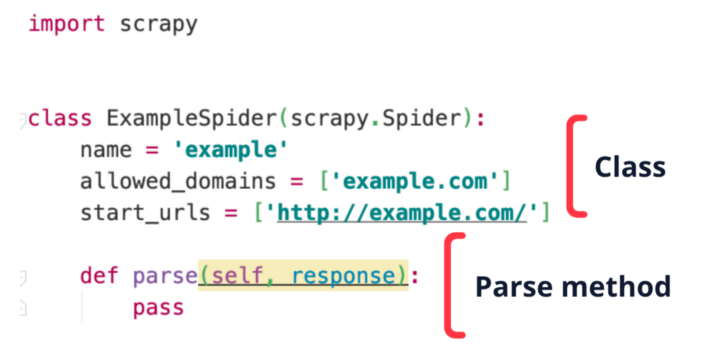

This is the basic template and is split into 2 parts: the class and parse method.

The class is built with the name of the spider and website we introduced in the previous command. You shouldn’t edit the name of the variables, but you can change the values. Edit the <b>allowed_domains</b> value and write the main domain of the website you wish to scrape (aka root or homepage). You should also edit the <b>start_urls</b> value and write the exact link you want to scrape.

The parse method needs to be built by us. Here we use the response object to find elements and then extract the text data we want. We’ll see how to build this in the next section.

<h3>Finding elements and getting the text value</h3>

In Scrapy, we use the <b>response</b> object to find elements. This is the equivalent of Beautiful Soup’s <b>soup</b> or Selenium’s <b>driver</b>.

Let’s have a look at the syntax of finding elements with Scrapy.

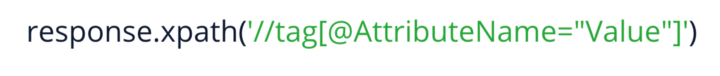

Unlike Selenium, there’s no <b>text</b> method that will help you get the text inside a node, so we have to include the text node in the XPath. In addition to that, you have to use either <b>.get()</b> or <b>.getall()</b> to get the text data. We use the first to get the first element that matches the XPath, while the latter will get all the elements that matched and put them inside a list.

Let’s see some examples.

<pre>Finding a single "h1" element and getting the text inside
title = response.xpath(‘//h1/text()’).get()</pre>

<pre>Finding multiple elements (returns a list)
response.xpath(‘//tag[@AttributeName=”Value”]/text()’).getall()</pre>

Note: The <b>/text()</b> indicates that the text element is an immediate child node of the previous element (e.g., <b>text()</b> should be the immediate child node of <b>h1</b> in the first example). If the text is not an immediate child node, you should either include the element that is in between or use <b>//text()</b> to get all the children element.

<h3>Return data extracted</h3>

To see the data extracted we have to use the <b>yield</b> keyword. For example, let’s return the <b>title</b> we extracted in the previous section.

<pre>def parse(self, response):
    title = response.xpath(‘//h1/text()’).get()

    # Return data extracted
    yield {
        'titles': title,
    }</pre>

As you can see, we should use <b>yield</b> inside the parse method.

<h3>Run the spider and export data to CSV or JSON</h3>

To run the spider and get the data we want, run the following command on a terminal.

scrapy crawl example

where <b>example</b> is the name of our spider.

To export the data to a CSV or JSON file use the following command.

<pre>scrapy crawl example -o name_of_file.csv
scrapy crawl example -o name_of_file.json</pre>

# Python Basics for Web Scraping

The following is the stuff you will frequently use when scraping a website regardless of the framework you use in Python (Beautiful Soup, Selenium, and Scrapy). I will also tell you why this stuff is important in web scraping.

<h3>Storing Data: List, Indexing</h3>

In Python, lists are used to store multiple items in a single variable. To create a list we have to place the elements inside square brackets <b>[]</b>, separated by commas. Consider the following list named <b>states</b> that contains the 4 most populated states in the US.

states = ["California", "Texas", "Florida", "New York"]

Each item in the list has an index (the position in the list). Python uses zero-based indexing. That means, the first element (“California”) has an index 0, the second(“Texas”) has index 1, and so on.

To access an element by its index we need to use square brackets again (this is known as indexing)

<pre>states = ["California", "Texas", "Florida", "New York"]
>>> states[0]
"California"
>>> states[1]
"Texas"
>>> states[3]
"New York"</pre>

We can also use negative indexes to get elements starting on the last position of the list. In this case, instead of using indexes from zero and above, we can use indexes from -1 and below.

<pre>states = ["California", "Texas", "Florida", "New York"]
>>> states[-1]
"New York"</pre>

Why is this important for Web Scraping? Lists are necessary to store all the data scraped, so we can later export it to a CSV file. On the other hand, indexing is used when we locate multiple elements with the same name and you want to select one in particular (e.g., a specific page in a pagination bar)

<h3>Working with the data stored: For loops and If statement</h3>

A typical step after storing elements in a list is looping through it so you can work with the elements. To do so, we have to use the <b>for</b> and <b>in</b> keywords. Let’s print each element of the <b>states</b> list we created before.

<pre>for state in states:
    print(state)</pre>

Breaking down the code:

<pre><b>states</b> is the name of the list of states we created
<b>for state in states</b> is looping through each item of the list
<b>print(state)</b> is executed once for each state of our <b>states</b> list</pre>

If we run this code, we obtain this:

<pre>California
Texas
Florida
New York</pre>

When we use the <b>if</b> statement. We’re telling Python ‘only continue when this condition is <b>True</b>’ To do so, we have to use the <b>if</b> keyword:

<pre>for state in states:
    if state == "Florida":
        print(state)</pre>

If we run this code, we only obtain “Florida” because we told Python ‘only print when the state is Florida’

Florida

<h3>Exporting the data: Python’s “with open() as” and Pandas’ dataframes</h3>

The simplest way to export the data scraped is using the built-in Python’s “with open() as” pattern. Let’s create a .txt file named <b>test</b>

<pre>with open('test.txt', 'w') as file:
    file.write('Data Exported!')</pre>

Breaking down the code:

<pre><b>open()</b>takes in a <b>file_name</b> and a <b>mode</b> and it opens the given filename in the current directory in the mode that you pass in.
<b>'test.txt'</b> is the name of the file we created
<b>‘w’</b> is the mode. There are write mode (‘w’), read mode (‘r’), and append mode (‘a’). Write mode (‘w’) deletes the existing file content, creating the file if it doesn’t already exist, and then allows you to write to the file.
<b>file</b> is the name that represents the “with open() as” pattern
<b>.write()</b> allows writing content inside the file created</pre>

If we run this code, we obtain a file named test.txt in our working directory. Open it and you will see the message “Data Exported!”

...

Another way to export the data extracted is using dataframes, but in this case, we have to install the Pandas library first.

pip install pandas

To easily create a dataframe, we will need to put the lists we created before into a dictionary. First, let’s create a second list named <b>population</b> and then put the <b>population</b> and <b>states</b> list inside a dictionary we will name <b>dict_states</b>. To create a dictionary, we place items inside curly braces {} separated by commas. An item has a key and a corresponding value that is expressed as a pair (key: value).

<pre>Second list
population = [39613493, 29730311, 21944577, 19299981]

Storing lists within dictionary
dict_states = {'States': states, 'Population': population}</pre>

Above we created the keys ‘States’ and ‘Population’ and set our two lists as values. Now we can easily create a dataframe using the <b>.from_dict</b> method. Let’s create a dataframe named <b>df_states</b>.

<pre>Creating the dataframe
df_states = pd.DataFrame.from_dict(dict_states)</pre>

To export the data to a CSV file we use <b>.to_csv()</b> and inside parentheses, we write the name of the file we want to create.

df_states.to_csv('states.csv')

If we run the code above, we obtain a CSV file named states.csv in our working directory. Open it and you will the two lists in columns A and B.

<h3>Handling an exception error: Try-Except</h3>

When scraping a website you will come across different exceptions. The element might not be in the DOM, the element might not be visible yet, etc. The best way to handle an exception error is to use the try and except statement.

To show you how this works let’s use the following list that contains integers and string elements.

new_list = [2, 4, 6, 'California']

Now let’s see what happens if I loop through the list and divide each element by 2.

<pre>for element in new_list:
    print(element/2)</pre>

If you run the code above you will get this

<pre>1.0
2.0
3.0
Traceback (most recent call last):
...
TypeError: unsupported operand type(s) for /: 'str' and 'int'</pre>

So the code perfectly worked for the first three elements but then failed because the fourth element is a string and not an integer.

When scraping a website, if we leave the code as it is, we won’t be able to store and then export the data because the code will break completely. This is why we have to use the <b>except</b> statement to let Python know how to handle an exception and then skip to the next iteration.

Python will execute the code following the <b>try</b> statement as a normal part of the script. However, Python will only execute the code following the <b>except</b> statement when the code runs into an error.

Let’s print a message every time the code runs into an error.

<pre>for element in new_list:
    try:
        print(element/2)
    except:
        print('The element is not a number!')</pre>

If you run the code above you will get this.

<pre>1.0
2.0
3.0
The element is not a number!</pre>

Although the fourth element isn’t a number, the code didn't break. Instead, we got a message that let us know what happened.

<h3>Workarounds: While-Break (Handling Beautiful Soup and Selenium limitations)</h3>

When a web scraping tool lacks some functionality, you have 2 options: either you learn from scratch how to use another scraping tool or find a workaround.

A good example of this is pagination. Scraping through multiple pages can be easily done on Scrapy. However, on Selenium and Beautiful Soup you might need to use the while loop. Below is the format of a while loop.

<pre>while <""expr"">:
    <""statement(s)""></pre>

<b><"statement(s)"></b> represents the block to be repeatedly executed. The <b><"expr"></b> is evaluated in boolean context. If it’s true, the body is executed and then <b><"expr"></b> checked again. If <b><"expr"></b> becomes false, the execution proceeds to the immediate code below the while loop

Let’s see the following example.

<pre>n = 4
while n > 0:
    print(n)
    n -= 1</pre>

If you run this code, Python will print <b>n</b> until it gets a value greater than 0, then the condition becomes false. The output is the following.

<pre>4
3
2
1</pre>

We can also force the while loop to break using the <b>break</b> keyword.

<pre>n = 4
while n > 0:
    print(n)
    n -= 1
    if n == 2:
        break

print('Loop ended.')</pre>

This time Python will only print <b>n</b> before it gets the value of 2, then the while loop will break and the immediate code below the loop <b>print(‘Loop ended.’)</b> will be executed. This is the output.

<pre>4
3
Loop ended.</pre>

That’s it! Now you’re ready to scrape a website with Python!